# 3장. 딥러닝을 위한 기초 수학

#### 딥러닝을 위한 기초 수학
    * 딥러닝을 배운다는 말에는 딥러닝의 실행법을 익히는 것 뿐아니라, 딥러닝의 수학 원리를 배운다는의미도 포함된다. 
    * 딥러닝 뒤에 있는 수학적 배경이 다른 머신러닝과 비교했을 때 그다지 어렵지 않다. 

#### 수업 자료
* C:\Users\lenovo\Documents\aibootcamp\Deep Learning\딥러닝_보조교재\chap03.pdf
* C:\Users\lenovo\Documents\aibootcamp\Deep Learning\딥러닝_보조교재\chap04.pdf
* C:\Users\lenovo\Documents\aibootcamp\Deep Learning\딥러닝_보조교재\chap05.pdf

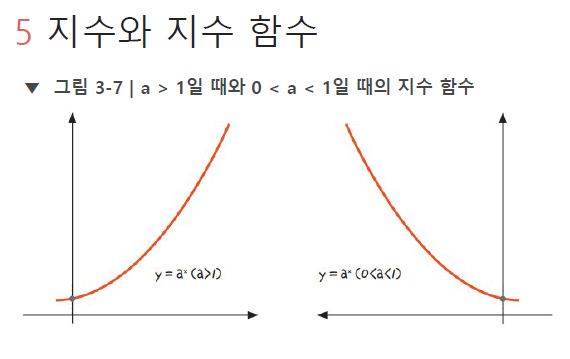

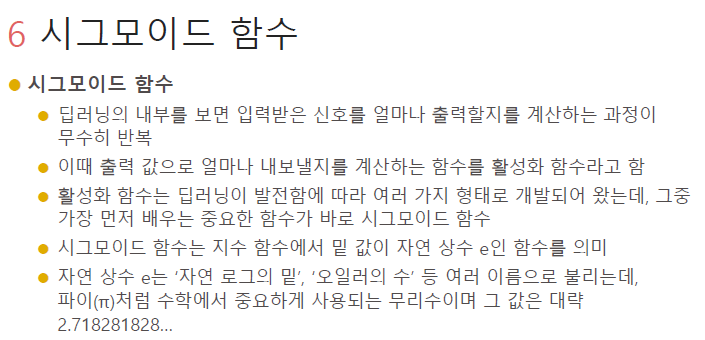

### 6. 시그모이드 함수
* 시그모이드 함수를 그래프로 그리면 S자 형태로 나타남. 
* 범위는 0부터 1까지 
* S자 형태로 그려지는 이 함수의 속성은 0 또는 1, 두 개의 값 중 하나를 고를 때 유용함. <br>
$f(x) = \cfrac{1}{1+e^{-x}}$

### 7. 로그와 로그함수
* 로지스틱 회귀에서 x 가 1에 가까워지거나, 0에 가까워질수록 오차가 커지는 그래프가 필요. 
* 이러한 그래프를 만들기 위해 $y = log_{a}x $를 x축 또는 y축으로 대칭이동하거나 알맞게 평행이동 한다.
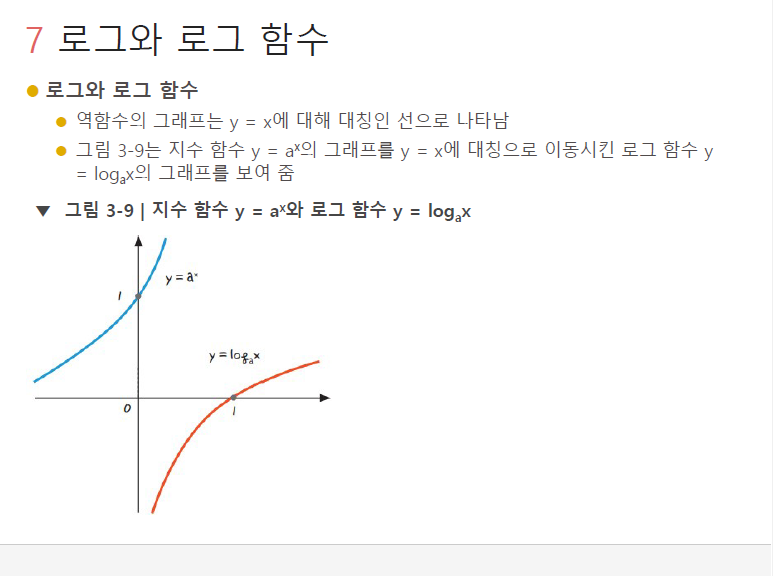
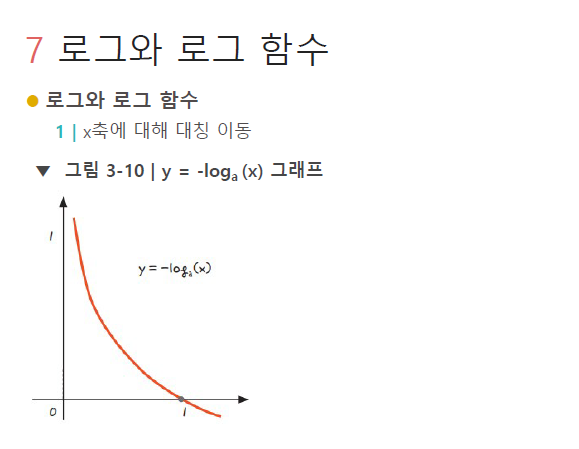
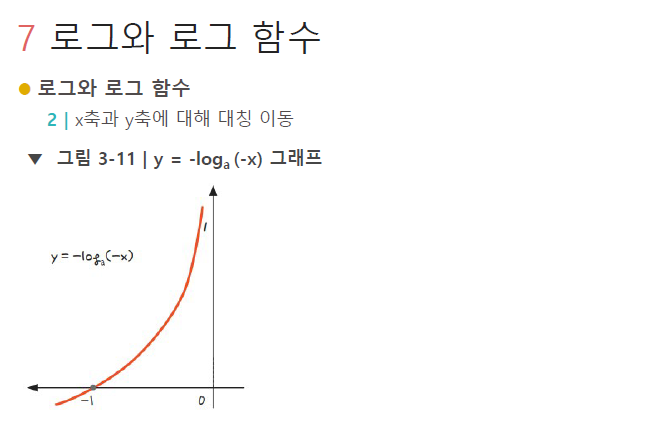
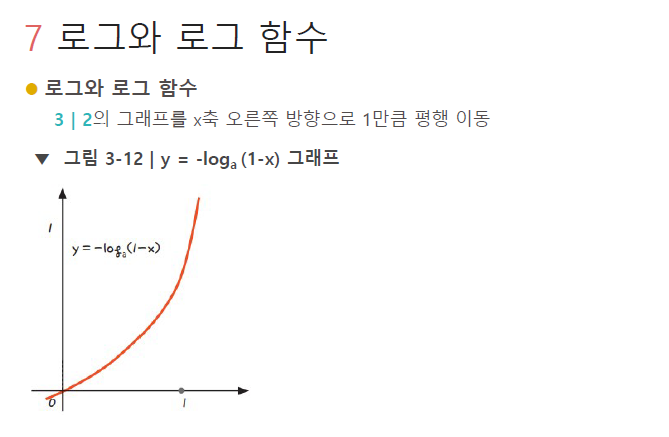

# 4장. 가장 훌륭한 예측선

## 4. 파이썬 코딩으로 확인하는 최소 제곱

### 최소제곱법
* 선형회귀를 위한 방법. 가장 정확한 선을 긋는 것이 목표
* 더 구체적으로는 $y = ax + b$ 정확한 기울기 a와 y절편 b를 알아내는 것
* 최소제곱법 공식을 알고 적용하면 일차함수의 기울기 a와 y절편 b를바로 구할 수 있다. 
* 공식 <br>
$ a = \cfrac{(x - x평균)(y - y평균)의 합}{(x - x평균)^2의 합}$

#### 1. 환경 준비

In [1]:
import numpy as np

#### 2. 데이터 준비

In [2]:
# 공부한 시간과 점수를 각각 x, y 라는이름의 넘파이 배열로 만든다. 
x = np.array([2, 4, 6, 8])
y = np.array([81, 93, 91, 97])

##### [x와 y의 평균값]

In [3]:
# x의 평균값을 구한다. 
mx = np.mean(x)

# y의 평균값을 구한다. 
my = np.mean(y)

#출력으로 확인
print('x의 평균값: ', mx)
print('y의 평균값: ', my)

x의 평균값:  5.0
y의 평균값:  90.5


##### [최소제곱법 공식의 분모와 분자]

In [4]:
# 최소제곱법 공식의 분모 부분
divisor = sum([(i - mx)**2 for i in x])

# 최소제곱법 공식의 분자 부분
def top(x, mx, y, my):
    d = 0
    for i in range(len(x)):
        d += (x[i] - mx) * (y[i] -my)
    return d
dividend = top(x, mx, y, my)
print('분모: ', divisor)
print('분자: ', dividend)

분모:  20.0
분자:  46.0


#### 3. 기울기와 y절편 구하기

In [5]:
# 기울기 a: 2.3
a = dividend / divisor

# y절편  b: 79.0
b = my - (mx*a)

# 출력으로 확인
print('기울기 a = ', a)
print('y절편 b = ', b)

기울기 a =  2.3
y절편 b =  79.0


* 위의 결과는 $y = 2.3x + 79$

### 5. 평균 제곱 오차
* 최소 제곱법만을 이용해 모든 상황을 해결하기 어려움
* 그래프의 기울기가 잘못되었을수록 빨간색 선의 거리의 합, 즉 오차의 합도 커진다. 
* 만일 기울기가 무한대로 커지면 오차도 무한대로 커지는 상관관계가 있다. 
* 오차가 실제로 얼마나 큰지 가늠하기 위해 음수를 양수로 변경해줘야 정확한 오차를 구할 수 있음. 따라서 오차에 제곱을 한다.  
* 거리는 입력데이터에 나와있는 y의 실제값.
* 공식 <br>
$$ MSE = \frac{1}{n}\sum(y_i - \hat{y_i})^2 $$

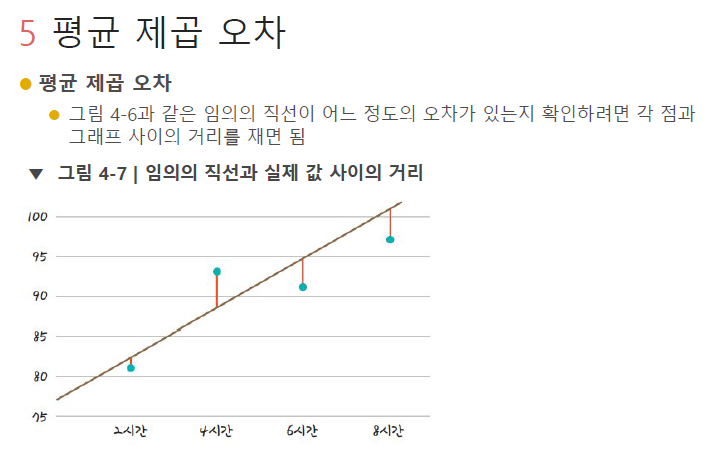

* 선형회귀는 임의의 직선을 그어 이에 대한 평균제곱오차(MSE)를 구하고 , 이 값을 가장 작게 만들어주는 a값과 b값을 찾다가는 작업

### 6. 파이썬 코딩으로 확인하는 평균 제곱 오차

#### 1. 환경 준비

In [6]:
import numpy as np

#### 2. 데이터 준비

In [7]:
# 가상읙 기울기 a와 y절편 b를 정한다. 
fake_a = 3 
fake_b = 76     #일단 아무숫자 넣어봄
x = np.array([2, 4, 6, 8])
y = np.array([81, 93, 91, 97])

#### 3. 평균 제곱 오차 (MSE) 구하기

In [8]:
# y = ax + b 에 가상의 a, b값을 대입한 결과를 출력하는 함수이다. 
def predict(x):
    return fake_a*x + fake_b

predict_result = []

for i in range(len(x)):
    predict_result.append(predict(x[i]))
    print('공부시간 = %.f. 실제점수 = %.f. 예측점수 = %.f.' % (x[i], y[i], predict(x[i])))

공부시간 = 2. 실제점수 = 81. 예측점수 = 82.
공부시간 = 4. 실제점수 = 93. 예측점수 = 88.
공부시간 = 6. 실제점수 = 91. 예측점수 = 94.
공부시간 = 8. 실제점수 = 97. 예측점수 = 100.


In [9]:
n = len(x)
def mse(y, y_pred):
    return (1/n) * sum((y - y_pred)**2 )

print('평균 제곱 오차: ' + str(mse(y, predict_result)))

평균 제곱 오차: 11.0


### 4. 실행을 위한 변수 설정

In [10]:
# 기울기 a와 절편 b의 값을 초기화합니다.
a = 0
b = 0

#학습률을 정합니다.
lr = 0.03

#몇 번 반복될지를 설정합니다. 
epochs = 2001 

# 5장. 선형 회귀 모델: 먼저 긋고 수정하기

### 5. 경사하강법
* 경사하강법은 반복적으로 기울기 a를 변화시켜서 m값을 찾아내는 방법
* 여기서 학습률(learning rate)이라는 개념을 알 수 있음. 
* 기울기의 부호를 바꾸어 이동시킬 때 적절한 거리를 찾지 못해 너무 크게 이동시키면 a값이 한 점으로 모이지 않고 발산함.
* 얼마 만큼 이동시킬지 결정해야하는데 이때 **이동거리** 를 정해주는 것이 학습률
* 딥러닝에서 학습률의 값을 적절히 바꾸면서 최적의 학습률을 찾는 것은 중요한 최적화 과정 중 하나.
* **경사하강법** 은 오차의 변화에 따라 **이차함수 그래프**를 만들고 적절한 **학습률**을 설정해 미분값이 0인 지점을 구하는 것. 
* 최적의 b값을 구할 대 역시 경사하강법을 사용

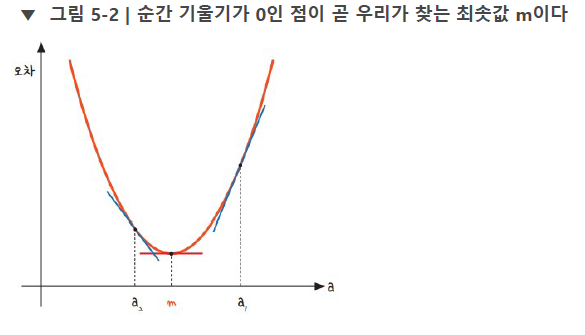

In [11]:
# x 값이 총 몇 개인지 셉니다.
n=len(x)

#경사 하강법을 시작합니다.
for i in range(epochs):                  # epoch 수 만큼 반복
    
    y_pred = a * x + b                   # 예측 값을 구하는 식입니다. 
    error = y - y_pred                   # 실제 값과 비교한 오차를 error로 놓습니다.
    
    a_diff = (2/n) * sum(-x * (error))   # 오차 함수를 a로 편미분한 값입니다. 
    b_diff = (2/n) * sum(-(error))       # 오차 함수를 b로 편미분한 값입니다. 
    
    a = a - lr * a_diff     # 학습률을 곱해 기존의 a 값을 업데이트합니다.
    b = b - lr * b_diff     # 학습률을 곱해 기존의 b 값을 업데이트합니다.
    
    if i % 100 == 0:        # 100번 반복될 때마다 현재의 a 값, b 값을 출력합니다.
        print("epoch=%.f, 기울기=%.04f, 절편=%.04f" % (i, a, b))        


#최소제곱법으로 구한 기울기, 절편과 동일한 값이 나왔다. 

epoch=0, 기울기=27.8400, 절편=5.4300
epoch=100, 기울기=7.0739, 절편=50.5117
epoch=200, 기울기=4.0960, 절편=68.2822
epoch=300, 기울기=2.9757, 절편=74.9678
epoch=400, 기울기=2.5542, 절편=77.4830
epoch=500, 기울기=2.3956, 절편=78.4293
epoch=600, 기울기=2.3360, 절편=78.7853
epoch=700, 기울기=2.3135, 절편=78.9192
epoch=800, 기울기=2.3051, 절편=78.9696
epoch=900, 기울기=2.3019, 절편=78.9886
epoch=1000, 기울기=2.3007, 절편=78.9957
epoch=1100, 기울기=2.3003, 절편=78.9984
epoch=1200, 기울기=2.3001, 절편=78.9994
epoch=1300, 기울기=2.3000, 절편=78.9998
epoch=1400, 기울기=2.3000, 절편=78.9999
epoch=1500, 기울기=2.3000, 절편=79.0000
epoch=1600, 기울기=2.3000, 절편=79.0000
epoch=1700, 기울기=2.3000, 절편=79.0000
epoch=1800, 기울기=2.3000, 절편=79.0000
epoch=1900, 기울기=2.3000, 절편=79.0000
epoch=2000, 기울기=2.3000, 절편=79.0000


* 위의 결과는 $y = 2.3x + 79$

## 5-1. 텐서플로에서 실행하는 선형 회귀 모델 

### 1. 환경 준비

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### 2. 데이터 준비

In [13]:
x = np.array([2,4,6,8])
y = np.array([81, 93, 91, 97])

### 3. 모델 실행

In [15]:
model = Sequential()
model.add(Dense(1, input_dim = 1, activation = 'linear'))        # 입력(input_dim = 1, 공부시간)이 1개, 출력(성적) 1개
model.compile(optimizer = 'sgd', loss = 'mse')      # optimizer는 확률적 경사하강법(sgd)
model.fit(x, y, epochs = 2000)      # epoch: 반복횟수

Epoch 1/2000
1/1 [==============================] - 0s 472ms/step - loss: 6787.3076
Epoch 2/2000
1/1 [==============================] - 0s 7ms/step - loss: 1834.9495
Epoch 3/2000
1/1 [==============================] - 0s 9ms/step - loss: 1102.1912
Epoch 4/2000
1/1 [==============================] - 0s 7ms/step - loss: 989.2216
Epoch 5/2000
1/1 [==============================] - 0s 7ms/step - loss: 967.3180
Epoch 6/2000
1/1 [==============================] - 0s 9ms/step - loss: 958.8241
Epoch 7/2000
1/1 [==============================] - 0s 5ms/step - loss: 952.3340
Epoch 8/2000
1/1 [==============================] - 0s 9ms/step - loss: 946.1721
Epoch 9/2000
1/1 [==============================] - 0s 6ms/step - loss: 940.0920
Epoch 10/2000
1/1 [==============================] - 0s 8ms/step - loss: 934.0576
Epoch 11/2000
1/1 [==============================] - 0s 6ms/step - loss: 928.0632
Epoch 12/2000
1/1 [==============================] - 0s 8ms/step - loss: 922.1077
Epoch 13/2000
1/1 [=

### 4. 그래프로 확인

1/1 [==============================] - 0s 103ms/step


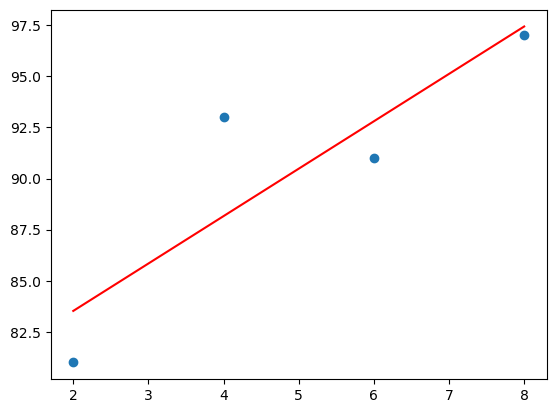

In [17]:
import matplotlib.pyplot as plt
plt.scatter(x, y)
plt.plot(x, model.predict(x), 'r')      #예측 셜과를 그래프로 나타낸다.

### 5. 모델 테스트

In [18]:
# 임의의 시간을 집어넣 점수를 예측하는 모델을 테스트해 보겠습니다. 
hour = 7
prediction = model.predict([hour])

print('%.f시간을 공부할 경우의 예상점수는 %.02f점입니다. ' % (hour, prediction))

1/1 [==============================] - 0s 52ms/step
7시간을 공부할 경우의 예상점수는 95.12점입니다. 


## 5-2 텐서플로에서 실행하는 다중 선형회귀 모델

### 2. 데이터 준비

In [20]:
x = np.array([[2, 0], [4, 4], [6, 2], [8, 3]])      #공부시간, 과외
y = np.array([81, 93, 91, 97])

### 3. 모델 실행

In [22]:
model = Sequential()
model.add(Dense(1, input_dim = 2, activation = 'linear'))       # input_dim = 2 이므로 다중 선형 회귀
model.compile(optimizer = 'sgd', loss = 'mse')       # 확률적 경사하강법(sgd)
model.fit(x, y, epochs = 2000)

Epoch 1/2000
1/1 [==============================] - 0s 309ms/step - loss: 8411.2383
Epoch 2/2000
1/1 [==============================] - 0s 5ms/step - loss: 1450.7284
Epoch 3/2000
1/1 [==============================] - 0s 5ms/step - loss: 955.7498
Epoch 4/2000
1/1 [==============================] - 0s 7ms/step - loss: 915.5255
Epoch 5/2000
1/1 [==============================] - 0s 6ms/step - loss: 907.3182
Epoch 6/2000
1/1 [==============================] - 0s 4ms/step - loss: 901.3973
Epoch 7/2000
1/1 [==============================] - 0s 8ms/step - loss: 895.6712
Epoch 8/2000
1/1 [==============================] - 0s 9ms/step - loss: 889.9927
Epoch 9/2000
1/1 [==============================] - 0s 8ms/step - loss: 884.3511
Epoch 10/2000
1/1 [==============================] - 0s 8ms/step - loss: 878.7455
Epoch 11/2000
1/1 [==============================] - 0s 7ms/step - loss: 873.1757
Epoch 12/2000
1/1 [==============================] - 0s 10ms/step - loss: 867.6412
Epoch 13/2000
1/1 [=

### 4. 모델 테스트

In [23]:
#임의의 학습 시간과 과외 시간을 집어넣어 점수를 예측하는 모델을 테스트해 보겠습니다.

hour = 7
private_class = 4
prediction = model.predict([[hour, private_class]])

print("%.f시간을 공부하고 %.f시간의 과외를 받을 경우, 예상 점수는 %.02f점입니다" % (hour, private_class, prediction))

1/1 [==============================] - 0s 134ms/step
7시간을 공부하고 4시간의 과외를 받을 경우, 예상 점수는 97.53점입니다
